#nbashots Tutorial

This tutorial will go over some of the basics on how you can use `nbashots` to access the NBA stats API and create some shot charts. I'll update this tutorial as I update or make changes to the package.

Now lets beginning by importing the libraries we will be using.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nbashots as nba # this will throw a warning if using matplotlib 1.5

%matplotlib inline

/home/savvas/miniconda/envs/py3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


#Getting the Data

##Getting the Player ID
The Player ID is one of the API paramter values we need in order to get the shooting data for a player. To get the Player ID for a given a player all you need to do is use the `get_player_id()` function and pass in the player's name in "Last Name, First Name" format. Just note that this function returns the Player ID within a `numpy` array as some players have the same name, so more than one ID may be returned.

Let's get the Player ID for Stephen Curry.

In [2]:
curry_id = nba.get_player_id("Curry, Stephen")[0]
curry_id

201939

There is another function, called `get_all_player_ids()`, that returns a `pandas DataFrame` containing a number of Player IDs depending on the value passed into the `ids` parameter. The `ids` parameter can accept 3 different strings, "shots" (the default value), "all_players", or "all_data".

When `ids` is set to "shots", a `DataFrame` containing only the Players (and their IDs) that have shooting data for our shot charts.

In [3]:
# "shots" is the defualt paramter value
players_with_shots = nba.get_all_player_ids("shots")
players_with_shots.head()

PERSON_ID DISPLAY_LAST_COMMA_FIRST
0       1505       Abdul-Wahad, Tariq
1        949     Abdur-Rahim, Shareef
2     101165              Acker, Alex
3     203112              Acy, Quincy
4     200801            Adams, Hassan

In [4]:
players_with_shots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 0 to 1491
Data columns (total 2 columns):
PERSON_ID                   1492 non-null int64
DISPLAY_LAST_COMMA_FIRST    1492 non-null object
dtypes: int64(1), object(1)
memory usage: 35.0+ KB


`PERSON_ID` is the column containing the Player IDs and `DISPLAY_LAST_COMMA_FIRST` is the columns conatining the Player names.

When `ids` is set to "all_players", `get_all_player_ids()` returns a `DataFrame` with all Players and their IDs used in the NBA stats API.

In [5]:
all_players = nba.get_all_player_ids("all_players")
all_players.head()

PERSON_ID DISPLAY_LAST_COMMA_FIRST
0      76001          Abdelnaby, Alaa
1      76002         Abdul-Aziz, Zaid
2      76003     Abdul-Jabbar, Kareem
3         51      Abdul-Rauf, Mahmoud
4       1505       Abdul-Wahad, Tariq

In [6]:
all_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4066 entries, 0 to 4065
Data columns (total 2 columns):
PERSON_ID                   4066 non-null int64
DISPLAY_LAST_COMMA_FIRST    4066 non-null object
dtypes: int64(1), object(1)
memory usage: 95.3+ KB


When `ids` is set to "all_data", `get_all_player_ids()` returns a `DataFrame` with all the data from the API call.

In [7]:
all_data = nba.get_all_player_ids("all_data")
all_data.head()

PERSON_ID DISPLAY_LAST_COMMA_FIRST  ROSTERSTATUS  FROM_YEAR  TO_YEAR  \
0      76001          Abdelnaby, Alaa             0       1990     1994   
1      76002         Abdul-Aziz, Zaid             0       1968     1977   
2      76003     Abdul-Jabbar, Kareem             0       1969     1988   
3         51      Abdul-Rauf, Mahmoud             0       1990     2000   
4       1505       Abdul-Wahad, Tariq             0       1997     2003   

                    PLAYERCODE  TEAM_ID TEAM_CITY TEAM_NAME TEAM_ABBREVIATION  \
0       HISTADD_alaa_abdelnaby        0                                         
1      HISTADD_zaid_abdul-aziz        0                                         
2  HISTADD_kareem_abdul-jabbar        0                                         
3   HISTADD_mahmoud_abdul-rauf        0                                         
4            tariq_abdul-wahad        0                                         

  TEAM_CODE GAMES_PLAYED_FLAG  
0                           Y  
1                           Y  
2                           Y  
3                           Y  
4                           Y

##Getting the Team ID
The Team ID is another parameter value we may use in order to get shooting data for a whole team, or to get the shooting data when a player or team faces a specific team. To get a single Team ID (as an `int`) use the `get_team_id()` function and pass in the team name ONLY. Not the city, or the city and team name.

In [8]:
# getting the Knicks' Team ID
knicks_id = nba.get_team_id("Knicks")
knicks_id

1610612752

There is also a `get_all_team_ids()` function that returns a `DataFrame` with all teams and their IDs.

In [9]:
all_team_ids = nba.get_all_team_ids()
all_team_ids.head()

TEAM_ID  TEAM_NAME
0           0           
1  1610612758      Kings
2  1610612763  Grizzlies
3  1610612760    Thunder
4  1610612752     Knicks

##Getting the Game ID
The Game ID is a parameter value we may use in order to get a player's or team's shooting data for a specific game. There are two ways you can do this. One way is to create a `PlayerLog` object which allows access to a player's game logs. The other way is to create a `TeamLog` object, which allows access to a team's game log. By getting the game logs we are then able to extract the Game ID for the specific game we want.

###Getting the Game ID using Player Game Logs

We can get Stephen Curry's game log by just passing his Player ID into the `PlayerLog()` like so:

In [10]:
# Create a PlayerLog instance to get Curry's game logs
curry_logs = nba.PlayerLog(curry_id)

Note that `PlayerLog()` has 4 parameters, `player_id`, `league_id`, `season`, and `season_type`, each representing the NBA stats API parameters needed to get the game logs data. `league_id` has the default value of "00". `season` has the default value of "2015-15". `season_type` has the default value of "Regular Season". The parameter values are stored in a `dictionary` and can be accessed as an attribute like so:

In [11]:
curry_logs.url_paramaters

{'LeagueID': '00',
 'PlayerID': 201939,
 'Season': '2015-16',
 'SeasonType': 'Regular Season'}

To get the game logs all we need to do is call the `get_game_logs()` method, which returns us a `DataFrame` with the game logs data.

In [12]:
curry_logs_df = curry_logs.get_game_logs()
curry_logs_df.head()

SEASON_ID  Player_ID     Game_ID  GAME_DATE      MATCHUP WL  MIN  FGM  FGA  \
0     22015     201939  0021500718 2016-01-31    GSW @ NYK  W   32    5   17   
1     22015     201939  0021500707 2016-01-30    GSW @ PHI  W   34    9   19   
2     22015     201939  0021500691 2016-01-27  GSW vs. DAL  W   32    4   11   
3     22015     201939  0021500675 2016-01-25  GSW vs. SAS  W   28   12   20   
4     22015     201939  0021500652 2016-01-22  GSW vs. IND  W   37   11   19   

   FG_PCT       ...         DREB  REB  AST  STL  BLK  TOV  PF  PTS  \
0   0.294       ...            4    4    4    3    0    3   1   13   
1   0.474       ...            3    5    6    1    2    8   3   23   
2   0.364       ...            1    2    9    3    1    0   2   14   
3   0.600       ...            1    2    3    5    0    1   0   37   
4   0.579       ...            8   10   12    1    0    2   1   39   

   PLUS_MINUS  VIDEO_AVAILABLE  
0          10                1  
1           8                1  
2          26                1  
3          23                1  
4          22                1  

[5 rows x 27 columns]

While you can get the Game ID you want from the `DataFrame` above. If you know the date of the game whose ID you want, you can just pass it (as a string) into the `get_game_id()` method. You can pass in the date in the numeric format of MM/DD/YY (like "01/09/16" or "01/09/2016") or the expanded Month Day, Year format (like "Jan 09, 2016" or "January 09, 2016").

In [13]:
# The next five examples all return the same Game ID
curry_logs.get_game_id("01/09/16")

'0021500556'

In [14]:
curry_logs.get_game_id("01/09/16")

'0021500556'

In [15]:
curry_logs.get_game_id("01/09/2016")

'0021500556'

In [16]:
curry_logs.get_game_id("Jan 09, 2016")

'0021500556'

In [17]:
curry_logs.get_game_id("January 09, 2016")

'0021500556'

###Getting the Game ID using Team Game Logs

Using `TeamLogs()` is the same as using using `PlayerLogs()`, but instead of passing in a Player ID you pass in a Team ID.

In [18]:
# Create a TeamLog object
knicks_logs = nba.TeamLog(knicks_id)

In [19]:
# Create a DataFrame containing the game logs data 
knicks_logs_df = knicks_logs.get_game_logs()
knicks_logs_df.head()

Team_ID     Game_ID  GAME_DATE      MATCHUP WL  MIN  FGM  FGA  FG_PCT  \
0  1610612752  0021500730 2016-02-02  NYK vs. BOS  L  240   31   82   0.378   
1  1610612752  0021500718 2016-01-31  NYK vs. GSW  L  240   33   90   0.367   
2  1610612752  0021500700 2016-01-29  NYK vs. PHX  W  240   36   84   0.429   
3  1610612752  0021500694 2016-01-28    NYK @ TOR  L  240   38   87   0.437   
4  1610612752  0021500679 2016-01-26  NYK vs. OKC  L  265   44   95   0.463   

   FG3M ...   FT_PCT  OREB  DREB  REB  AST  STL  BLK  TOV  PF  PTS  
0     6 ...    0.750    16    34   50   13    3    4   16  16   89  
1     6 ...    0.885    12    29   41   19    6    4   11  20   95  
2     7 ...    0.885    10    39   49   24   12    7    8  18  102  
3     7 ...    0.500    12    28   40   20    6    8    9  19   93  
4    11 ...    0.767     9    33   42   24    9    7    9  21  122  

[5 rows x 24 columns]

In [20]:
# Get the Game ID for a specific date
knicks_logs.get_game_id("1/10/16")

'0021500562'

##Getting the Shot Chart Data
Now that we know how to get the values for the `player_id`, `team_id`, and `game_id` parameters lets use the `Shots` class to get some shot chart data.

In [21]:
shots = nba.Shots()

There are a lot of parameters for `Shots`, which I won't go over in detail right now (I plan on including a full description when I finish up the documentation). The paramaters and default values are as follows:

    player_id=0
    team_id=0
    league_id="00"
    season="2015-16"
    season_type="Regular Season"
    game_id=""
    outcome=""
    location=""
    month=0, season_segment=""
    date_from=""
    date_to=""
    opp_team_id=0
    vs_conference=""
    vs_division=""
    position=""
    rookie_year=""
    game_segment=""
    period=0
    last_n_games=0
    clutch_time=""
    ahead_behind=""
    point_diff=""
    range_type="" 
    start_period=""
    end_period=""
    start_range=""
    end_range=""
    context_filter=""
    context_measure="FGA"

If we call the method `get_shots()` with the default parameter values, we get all the shots taken for the current season.

In [22]:
current_season_shots = shots.get_shots()

In [23]:
current_season_shots.head()

GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID  \
0  Shot Chart Detail  0021500001              2     203083   
1  Shot Chart Detail  0021500001              5     202694   
2  Shot Chart Detail  0021500001              6     200794   
3  Shot Chart Detail  0021500001              7     203484   
4  Shot Chart Detail  0021500001              8     201143   

                PLAYER_NAME     TEAM_ID        TEAM_NAME  PERIOD  \
0            Andre Drummond  1610612765  Detroit Pistons       1   
1             Marcus Morris  1610612765  Detroit Pistons       1   
2              Paul Millsap  1610612737    Atlanta Hawks       1   
3  Kentavious Caldwell-Pope  1610612765  Detroit Pistons       1   
4                Al Horford  1610612737    Atlanta Hawks       1   

   MINUTES_REMAINING  SECONDS_REMAINING       ...        \
0                 11                 41       ...         
1                 11                 21       ...         
2                 11                  0       ...         
3                 10                 44       ...         
4                 10                 27       ...         

                  ACTION_TYPE       SHOT_TYPE        SHOT_ZONE_BASIC  \
0          Driving Layup Shot  2PT Field Goal        Restricted Area   
1         Step Back Jump shot  2PT Field Goal              Mid-Range   
2         Step Back Jump shot  2PT Field Goal  In The Paint (Non-RA)   
3  Driving Floating Jump Shot  2PT Field Goal  In The Paint (Non-RA)   
4                   Jump Shot  2PT Field Goal              Mid-Range   

         SHOT_ZONE_AREA  SHOT_ZONE_RANGE SHOT_DISTANCE  LOC_X  LOC_Y  \
0             Center(C)  Less Than 8 ft.             1    -17     -6   
1         Right Side(R)         8-16 ft.            13    117     67   
2         Right Side(R)         8-16 ft.            12     76     95   
3          Left Side(L)         8-16 ft.             8    -68     51   
4  Left Side Center(LC)        16-24 ft.            20   -117    164   

   SHOT_ATTEMPTED_FLAG  SHOT_MADE_FLAG  
0                    1               0  
1                    1               1  
2                    1               1  
3                    1               1  
4                    1               0  

[5 rows x 21 columns]

In [24]:
current_season_shots.tail()

GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID  \
123025  Shot Chart Detail  0021500732            504    1626164   
123026  Shot Chart Detail  0021500732            507     203141   
123027  Shot Chart Detail  0021500732            520     203141   
123028  Shot Chart Detail  0021500732            531    1626164   
123029  Shot Chart Detail  0021500732            533     200782   

            PLAYER_NAME     TEAM_ID     TEAM_NAME  PERIOD  MINUTES_REMAINING  \
123025     Devin Booker  1610612756  Phoenix Suns       4                  0   
123026  Mirza Teletovic  1610612756  Phoenix Suns       4                  0   
123027  Mirza Teletovic  1610612756  Phoenix Suns       4                  0   
123028     Devin Booker  1610612756  Phoenix Suns       4                  0   
123029        PJ Tucker  1610612756  Phoenix Suns       4                  0   

        SECONDS_REMAINING       ...       ACTION_TYPE       SHOT_TYPE  \
123025                 35       ...         Jump Shot  3PT Field Goal   
123026                 32       ...         Jump Shot  3PT Field Goal   
123027                 23       ...         Jump Shot  3PT Field Goal   
123028                 14       ...         Jump Shot  3PT Field Goal   
123029                  9       ...         Jump Shot  3PT Field Goal   

          SHOT_ZONE_BASIC         SHOT_ZONE_AREA SHOT_ZONE_RANGE  \
123025  Above the Break 3   Left Side Center(LC)         24+ ft.   
123026     Right Corner 3          Right Side(R)         24+ ft.   
123027  Above the Break 3  Right Side Center(RC)         24+ ft.   
123028  Above the Break 3  Right Side Center(RC)         24+ ft.   
123029      Left Corner 3           Left Side(L)         24+ ft.   

       SHOT_DISTANCE  LOC_X  LOC_Y  SHOT_ATTEMPTED_FLAG  SHOT_MADE_FLAG  
123025            25   -114    228                    1               0  
123026            22    227      0                    1               1  
123027            24     92    228                    1               0  
123028            25    155    208                    1               0  
123029            23   -237      2                    1               0  

[5 rows x 21 columns]

In [25]:
current_season_shots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123030 entries, 0 to 123029
Data columns (total 21 columns):
GRID_TYPE              123030 non-null object
GAME_ID                123030 non-null object
GAME_EVENT_ID          123030 non-null int64
PLAYER_ID              123030 non-null int64
PLAYER_NAME            123030 non-null object
TEAM_ID                123030 non-null int64
TEAM_NAME              123030 non-null object
PERIOD                 123030 non-null int64
MINUTES_REMAINING      123030 non-null int64
SECONDS_REMAINING      123030 non-null int64
EVENT_TYPE             123030 non-null object
ACTION_TYPE            123030 non-null object
SHOT_TYPE              123030 non-null object
SHOT_ZONE_BASIC        123030 non-null object
SHOT_ZONE_AREA         123030 non-null object
SHOT_ZONE_RANGE        123030 non-null object
SHOT_DISTANCE          123030 non-null int64
LOC_X                  123030 non-null int64
LOC_Y                  123030 non-null int64
SHOT_ATTEMPTED_FLAG    1

When both `player_id` and `team_id` are set to 0, the shots for the whole league are retrieved. So if we wanted to get all the shot chart data from last season we could either create another `Shots` instance and call `get_shots()` like so:

    last_season_shots = nba.Shots(season="2014-15").get_shots()

Or we could use the `update_params()` method, which accepts a dictionary containing key, value pairs that correspond with NBA stats API parameters.

In [26]:
# The dictionary that contains the current API parameters
shots.url_paramaters

{'AheadBehind': '',
 'ClutchTime': '',
 'ContextFilter': '',
 'ContextMeasure': 'FGA',
 'DateFrom': '',
 'DateTo': '',
 'EndPeriod': '',
 'EndRange': '',
 'GameID': '',
 'GameSegment': '',
 'LastNGames': 0,
 'LeagueID': '00',
 'Location': '',
 'Month': 0,
 'OpponentTeamID': 0,
 'Outcome': '',
 'Period': 0,
 'PlayerID': 0,
 'PointDiff': '',
 'Position': '',
 'RangeType': '',
 'RookieYear': '',
 'Season': '2015-16',
 'SeasonSegment': '',
 'SeasonType': 'Regular Season',
 'StartPeriod': '',
 'StartRange': '',
 'TeamID': 0,
 'VsConference': '',
 'VsDivision': ''}

In [27]:
# update the 'Season' parameter to '2014-15'
shots.update_params({'Season':'2014-15'})
# the updated parameters
shots.url_paramaters

{'AheadBehind': '',
 'ClutchTime': '',
 'ContextFilter': '',
 'ContextMeasure': 'FGA',
 'DateFrom': '',
 'DateTo': '',
 'EndPeriod': '',
 'EndRange': '',
 'GameID': '',
 'GameSegment': '',
 'LastNGames': 0,
 'LeagueID': '00',
 'Location': '',
 'Month': 0,
 'OpponentTeamID': 0,
 'Outcome': '',
 'Period': 0,
 'PlayerID': 0,
 'PointDiff': '',
 'Position': '',
 'RangeType': '',
 'RookieYear': '',
 'Season': '2014-15',
 'SeasonSegment': '',
 'SeasonType': 'Regular Season',
 'StartPeriod': '',
 'StartRange': '',
 'TeamID': 0,
 'VsConference': '',
 'VsDivision': ''}

In [28]:
last_season_shots = shots.get_shots()

In [29]:
last_season_shots.head()

GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID     PLAYER_NAME  \
0  Shot Chart Detail  0021400001              2     203076   Anthony Davis   
1  Shot Chart Detail  0021400001              4     202696  Nikola Vucevic   
2  Shot Chart Detail  0021400001              7     203076   Anthony Davis   
3  Shot Chart Detail  0021400001              9     203901   Elfrid Payton   
4  Shot Chart Detail  0021400001             25     203076   Anthony Davis   

      TEAM_ID             TEAM_NAME  PERIOD  MINUTES_REMAINING  \
0  1610612740  New Orleans Pelicans       1                 11   
1  1610612753         Orlando Magic       1                 11   
2  1610612740  New Orleans Pelicans       1                 11   
3  1610612753         Orlando Magic       1                 10   
4  1610612740  New Orleans Pelicans       1                 10   

   SECONDS_REMAINING       ...           ACTION_TYPE       SHOT_TYPE  \
0                 43       ...             Jump Shot  2PT Field Goal   
1                 31       ...        Jump Bank Shot  2PT Field Goal   
2                  6       ...             Jump Shot  2PT Field Goal   
3                 54       ...            Layup Shot  2PT Field Goal   
4                 29       ...             Dunk Shot  2PT Field Goal   

   SHOT_ZONE_BASIC        SHOT_ZONE_AREA  SHOT_ZONE_RANGE SHOT_DISTANCE  \
0        Mid-Range             Center(C)        16-24 ft.            20   
1        Mid-Range             Center(C)        16-24 ft.            18   
2        Mid-Range  Left Side Center(LC)        16-24 ft.            18   
3  Restricted Area             Center(C)  Less Than 8 ft.             1   
4  Restricted Area             Center(C)  Less Than 8 ft.             0   

   LOC_X  LOC_Y  SHOT_ATTEMPTED_FLAG  SHOT_MADE_FLAG  
0     50    194                    1               0  
1     -8    189                    1               1  
2   -131    127                    1               0  
3    -15      4                    1               0  
4      0      1                    1               1  

[5 rows x 21 columns]

In [30]:
last_season_shots.tail()

GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID   PLAYER_NAME  \
205545  Shot Chart Detail  0021401230            567     200797  Ryan Hollins   
205546  Shot Chart Detail  0021401230            568     203913  Jabari Brown   
205547  Shot Chart Detail  0021401230            570     203463  Ben McLemore   
205548  Shot Chart Detail  0021401230            572     203527    Ryan Kelly   
205549  Shot Chart Detail  0021401230            576     203135  Robert Sacre   

           TEAM_ID           TEAM_NAME  PERIOD  MINUTES_REMAINING  \
205545  1610612758    Sacramento Kings       4                  1   
205546  1610612747  Los Angeles Lakers       4                  0   
205547  1610612758    Sacramento Kings       4                  0   
205548  1610612747  Los Angeles Lakers       4                  0   
205549  1610612747  Los Angeles Lakers       4                  0   

        SECONDS_REMAINING       ...                ACTION_TYPE  \
205545                  2       ...        Alley Oop Dunk Shot   
205546                 51       ...                  Jump Shot   
205547                 41       ...                  Jump Shot   
205548                 30       ...          Running Bank shot   
205549                  0       ...                  Jump Shot   

             SHOT_TYPE        SHOT_ZONE_BASIC         SHOT_ZONE_AREA  \
205545  2PT Field Goal        Restricted Area              Center(C)   
205546  2PT Field Goal        Restricted Area              Center(C)   
205547  3PT Field Goal      Above the Break 3  Right Side Center(RC)   
205548  2PT Field Goal  In The Paint (Non-RA)              Center(C)   
205549  2PT Field Goal              Mid-Range  Right Side Center(RC)   

        SHOT_ZONE_RANGE SHOT_DISTANCE  LOC_X  LOC_Y  SHOT_ATTEMPTED_FLAG  \
205545  Less Than 8 ft.             0      0      1                    1   
205546  Less Than 8 ft.             3    -12     35                    1   
205547          24+ ft.            27    115    249                    1   
205548  Less Than 8 ft.             7     15     76                    1   
205549        16-24 ft.            20    125    168                    1   

        SHOT_MADE_FLAG  
205545               1  
205546               0  
205547               0  
205548               1  
205549               1  

[5 rows x 21 columns]

In [31]:
last_season_shots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205550 entries, 0 to 205549
Data columns (total 21 columns):
GRID_TYPE              205550 non-null object
GAME_ID                205550 non-null object
GAME_EVENT_ID          205550 non-null int64
PLAYER_ID              205550 non-null int64
PLAYER_NAME            205550 non-null object
TEAM_ID                205550 non-null int64
TEAM_NAME              205550 non-null object
PERIOD                 205550 non-null int64
MINUTES_REMAINING      205550 non-null int64
SECONDS_REMAINING      205550 non-null int64
EVENT_TYPE             205550 non-null object
ACTION_TYPE            205550 non-null object
SHOT_TYPE              205550 non-null object
SHOT_ZONE_BASIC        205550 non-null object
SHOT_ZONE_AREA         205550 non-null object
SHOT_ZONE_RANGE        205550 non-null object
SHOT_DISTANCE          205550 non-null int64
LOC_X                  205550 non-null int64
LOC_Y                  205550 non-null int64
SHOT_ATTEMPTED_FLAG    2

###Getting a Team's Shot Chart Data

To get the shot chart data for a team all we need is to pass in the Team's ID into the `team_id` paramater in `Shots`, and then call the `get_shots()` method.

In [32]:
# Create a Shots object
knicks_shots = nba.Shots(team_id=knicks_id)
# Return the shot chart data as a DataFrame
knicks_shots_df = knicks_shots.get_shots()

In [33]:
knicks_shots_df.head()

GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID  \
0  Shot Chart Detail  0021500012              2     201577   
1  Shot Chart Detail  0021500012             14       2546   
2  Shot Chart Detail  0021500012             20     101181   
3  Shot Chart Detail  0021500012             29       2756   
4  Shot Chart Detail  0021500012             37     204001   

          PLAYER_NAME     TEAM_ID        TEAM_NAME  PERIOD  MINUTES_REMAINING  \
0         Robin Lopez  1610612752  New York Knicks       1                 11   
1     Carmelo Anthony  1610612752  New York Knicks       1                 10   
2       Jose Calderon  1610612752  New York Knicks       1                  9   
3       Sasha Vujacic  1610612752  New York Knicks       1                  9   
4  Kristaps Porzingis  1610612752  New York Knicks       1                  8   

   SECONDS_REMAINING       ...                ACTION_TYPE       SHOT_TYPE  \
0                 46       ...                  Dunk Shot  2PT Field Goal   
1                 22       ...                  Jump Shot  2PT Field Goal   
2                 50       ...                 Layup Shot  2PT Field Goal   
3                  4       ...        Step Back Jump shot  3PT Field Goal   
4                 33       ...                 Layup Shot  2PT Field Goal   

   SHOT_ZONE_BASIC SHOT_ZONE_AREA  SHOT_ZONE_RANGE SHOT_DISTANCE  LOC_X  \
0  Restricted Area      Center(C)  Less Than 8 ft.             0      0   
1        Mid-Range  Right Side(R)         8-16 ft.            14     91   
2  Restricted Area      Center(C)  Less Than 8 ft.             0     -8   
3    Left Corner 3   Left Side(L)          24+ ft.            23   -238   
4  Restricted Area      Center(C)  Less Than 8 ft.             2    -19   

   LOC_Y  SHOT_ATTEMPTED_FLAG  SHOT_MADE_FLAG  
0      1                    1               1  
1    115                    1               0  
2      0                    1               0  
3     13                    1               0  
4     16                    1               0  

[5 rows x 21 columns]

Every `Shots` instance has the method `get_league_avg()`, that returns the league totals and averages for each shooting zone and area.

In [34]:
knicks_shots.get_league_avg()

GRID_TYPE        SHOT_ZONE_BASIC         SHOT_ZONE_AREA  \
0   League Averages      Above the Break 3         Back Court(BC)   
1   League Averages      Above the Break 3              Center(C)   
2   League Averages      Above the Break 3   Left Side Center(LC)   
3   League Averages      Above the Break 3  Right Side Center(RC)   
4   League Averages              Backcourt         Back Court(BC)   
5   League Averages  In The Paint (Non-RA)              Center(C)   
6   League Averages  In The Paint (Non-RA)              Center(C)   
7   League Averages  In The Paint (Non-RA)           Left Side(L)   
8   League Averages  In The Paint (Non-RA)          Right Side(R)   
9   League Averages          Left Corner 3           Left Side(L)   
10  League Averages              Mid-Range              Center(C)   
11  League Averages              Mid-Range              Center(C)   
12  League Averages              Mid-Range   Left Side Center(LC)   
13  League Averages              Mid-Range           Left Side(L)   
14  League Averages              Mid-Range           Left Side(L)   
15  League Averages              Mid-Range  Right Side Center(RC)   
16  League Averages              Mid-Range          Right Side(R)   
17  League Averages              Mid-Range          Right Side(R)   
18  League Averages        Restricted Area              Center(C)   
19  League Averages         Right Corner 3          Right Side(R)   

    SHOT_ZONE_RANGE    FGA    FGM  FG_PCT  
0   Back Court Shot     38      2   0.053  
1           24+ ft.   6372   2202   0.346  
2           24+ ft.   9845   3387   0.344  
3           24+ ft.   9319   3276   0.352  
4   Back Court Shot    252      8   0.032  
5          8-16 ft.   4023   1681   0.418  
6   Less Than 8 ft.  11474   4451   0.388  
7          8-16 ft.   1300    530   0.408  
8          8-16 ft.   1131    466   0.412  
9           24+ ft.   4515   1690   0.374  
10        16-24 ft.   4415   1754   0.397  
11         8-16 ft.   1339    589   0.440  
12        16-24 ft.   4708   1892   0.402  
13        16-24 ft.   3344   1355   0.405  
14         8-16 ft.   4546   1726   0.380  
15        16-24 ft.   4893   1950   0.399  
16        16-24 ft.   2865   1158   0.404  
17         8-16 ft.   4592   1839   0.400  
18  Less Than 8 ft.  39841  23671   0.594  
19          24+ ft.   4218   1581   0.375

To return the data as JSON, we can just call the `to_json()` from the `DataFrame` containing the data.

In [35]:
from pprint import pprint # to pretty print the JSON

In [36]:
# Return data as JSON from DataFrame using to_json()
pprint(knicks_shots.get_league_avg().to_json())

('{"GRID_TYPE":{"0":"League Averages","1":"League Averages","2":"League '
 'Averages","3":"League Averages","4":"League Averages","5":"League '
 'Averages","6":"League Averages","7":"League Averages","8":"League '
 'Averages","9":"League Averages","10":"League Averages","11":"League '
 'Averages","12":"League Averages","13":"League Averages","14":"League '
 'Averages","15":"League Averages","16":"League Averages","17":"League '
 'Averages","18":"League Averages","19":"League '
 'Averages"},"SHOT_ZONE_BASIC":{"0":"Above the Break 3","1":"Above the Break '
 '3","2":"Above the Break 3","3":"Above the Break 3","4":"Backcourt","5":"In '
 'The Paint (Non-RA)","6":"In The Paint (Non-RA)","7":"In The Paint '
 '(Non-RA)","8":"In The Paint (Non-RA)","9":"Left Corner '
 '3","10":"Mid-Range","11":"Mid-Range","12":"Mid-Range","13":"Mid-Range","14":"Mid-Range","15":"Mid-Range","16":"Mid-Range","17":"Mid-Range","18":"Restricted '
 'Area","19":"Right Corner 3"},"SHOT_ZONE_AREA":{"0":"Back '
 'Court(BC

###Getting a Player's Shot Chart Data
All we need to do to get a player's data is pass in his Player ID into `Shots()`.

In [37]:
curry_shots_df = nba.Shots(curry_id).get_shots()

In [38]:
curry_shots_df.head()

GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID    PLAYER_NAME  \
0  Shot Chart Detail  0021500003              6     201939  Stephen Curry   
1  Shot Chart Detail  0021500003              9     201939  Stephen Curry   
2  Shot Chart Detail  0021500003             14     201939  Stephen Curry   
3  Shot Chart Detail  0021500003             19     201939  Stephen Curry   
4  Shot Chart Detail  0021500003             36     201939  Stephen Curry   

      TEAM_ID              TEAM_NAME  PERIOD  MINUTES_REMAINING  \
0  1610612744  Golden State Warriors       1                 10   
1  1610612744  Golden State Warriors       1                 10   
2  1610612744  Golden State Warriors       1                  9   
3  1610612744  Golden State Warriors       1                  9   
4  1610612744  Golden State Warriors       1                  7   

   SECONDS_REMAINING       ...                           ACTION_TYPE  \
0                 56       ...        Cutting Finger Roll Layup Shot   
1                 29       ...                             Jump Shot   
2                 34       ...                            Layup Shot   
3                 13       ...                             Jump Shot   
4                 11       ...                    Running Layup Shot   

        SHOT_TYPE    SHOT_ZONE_BASIC        SHOT_ZONE_AREA  SHOT_ZONE_RANGE  \
0  2PT Field Goal    Restricted Area             Center(C)  Less Than 8 ft.   
1  3PT Field Goal  Above the Break 3  Left Side Center(LC)          24+ ft.   
2  2PT Field Goal    Restricted Area             Center(C)  Less Than 8 ft.   
3  3PT Field Goal  Above the Break 3  Left Side Center(LC)          24+ ft.   
4  2PT Field Goal    Restricted Area             Center(C)  Less Than 8 ft.   

  SHOT_DISTANCE  LOC_X  LOC_Y  SHOT_ATTEMPTED_FLAG  SHOT_MADE_FLAG  
0             3     12     31                    1               1  
1            26   -176    195                    1               0  
2             2     20      9                    1               0  
3            27   -197    193                    1               1  
4             0     -4      8                    1               1  

[5 rows x 21 columns]

#Creating Shot Charts

##Using the `shot_chart()` function
The `shot_chart()` function lets you quickly create a shot by passing in the x and y values that represent the player's or team's shots. The x and y values are stored in the `LOC_X` and `LOC_Y` columns in the `DataFrame` returned by `get_shots()`.

Lets plot the Knick's and Curry's FGA.

###Scatter Shot Charts

In [39]:
# Set the size for our plots
plt.rcParams['figure.figsize'] = (12, 11)

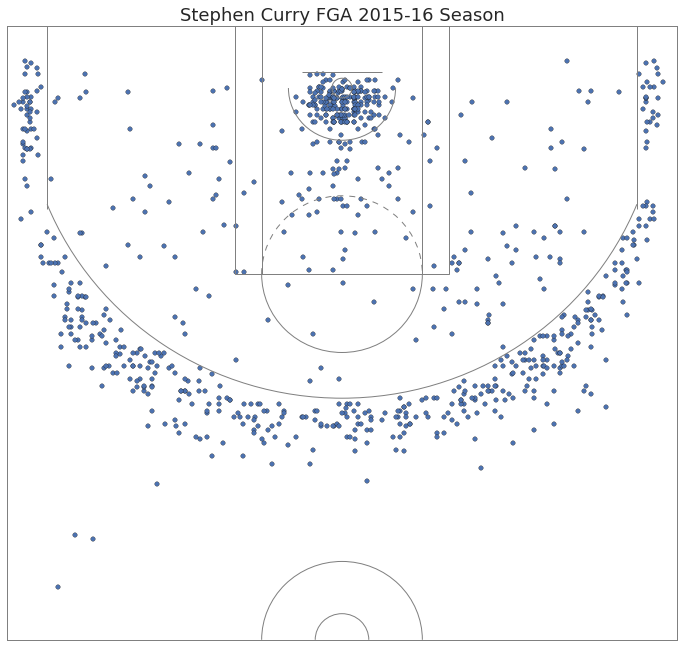

In [40]:
# Pass in Curry's FGA coordinates to shot_charts()
nba.shot_chart(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
              title="Stephen Curry FGA 2015-16 Season")

plt.show()

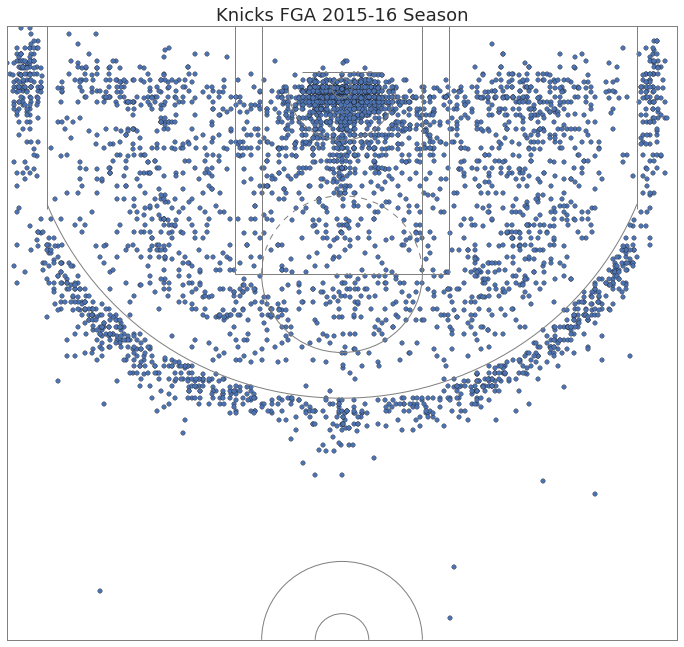

In [41]:
# Knicks FGA
nba.shot_chart(knicks_shots_df.LOC_X, knicks_shots_df.LOC_Y,
              title="Knicks FGA 2015-16 Season")
plt.show()

Lets differentiate between made missed FGA

In [42]:
knicks_shots_df.head()

GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID  \
0  Shot Chart Detail  0021500012              2     201577   
1  Shot Chart Detail  0021500012             14       2546   
2  Shot Chart Detail  0021500012             20     101181   
3  Shot Chart Detail  0021500012             29       2756   
4  Shot Chart Detail  0021500012             37     204001   

          PLAYER_NAME     TEAM_ID        TEAM_NAME  PERIOD  MINUTES_REMAINING  \
0         Robin Lopez  1610612752  New York Knicks       1                 11   
1     Carmelo Anthony  1610612752  New York Knicks       1                 10   
2       Jose Calderon  1610612752  New York Knicks       1                  9   
3       Sasha Vujacic  1610612752  New York Knicks       1                  9   
4  Kristaps Porzingis  1610612752  New York Knicks       1                  8   

   SECONDS_REMAINING       ...                ACTION_TYPE       SHOT_TYPE  \
0                 46       ...                  Dunk Shot  2PT Field Goal   
1                 22       ...                  Jump Shot  2PT Field Goal   
2                 50       ...                 Layup Shot  2PT Field Goal   
3                  4       ...        Step Back Jump shot  3PT Field Goal   
4                 33       ...                 Layup Shot  2PT Field Goal   

   SHOT_ZONE_BASIC SHOT_ZONE_AREA  SHOT_ZONE_RANGE SHOT_DISTANCE  LOC_X  \
0  Restricted Area      Center(C)  Less Than 8 ft.             0      0   
1        Mid-Range  Right Side(R)         8-16 ft.            14     91   
2  Restricted Area      Center(C)  Less Than 8 ft.             0     -8   
3    Left Corner 3   Left Side(L)          24+ ft.            23   -238   
4  Restricted Area      Center(C)  Less Than 8 ft.             2    -19   

   LOC_Y  SHOT_ATTEMPTED_FLAG  SHOT_MADE_FLAG  
0      1                    1               1  
1    115                    1               0  
2      0                    1               0  
3     13                    1               0  
4     16                    1               0  

[5 rows x 21 columns]

###KDE shot charts
We can also create kernel density estimate (kde) shot charts and hexbin shot charts by passing in the appropriate string to the `kind` parameter. "kde" for a kde shot chart and "hex" for a hexbin shot chart. The default value for `kind` is "scatter" which creates the type of shot charts above. 

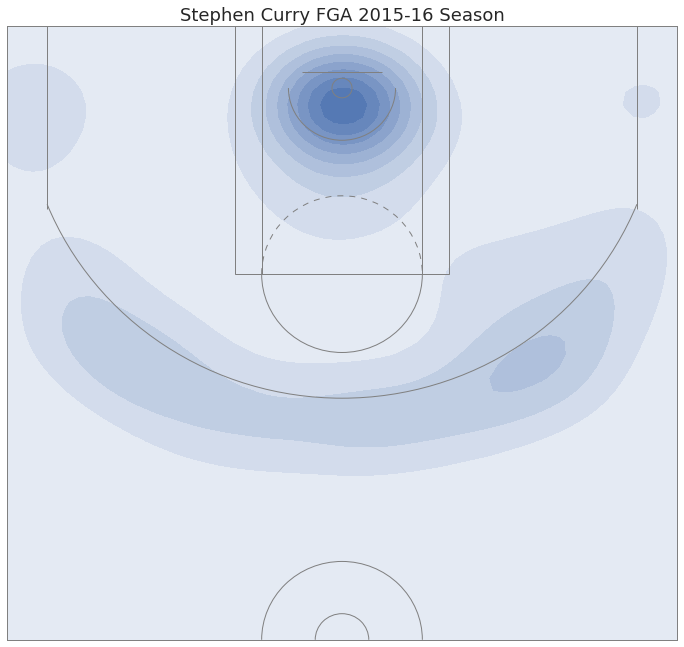

In [43]:
# Curry KDE plot
# Pass in Curry's FGA coordinates to shot_charts()
nba.shot_chart(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
               kind="kde", title="Stephen Curry FGA 2015-16 Season")

plt.show()

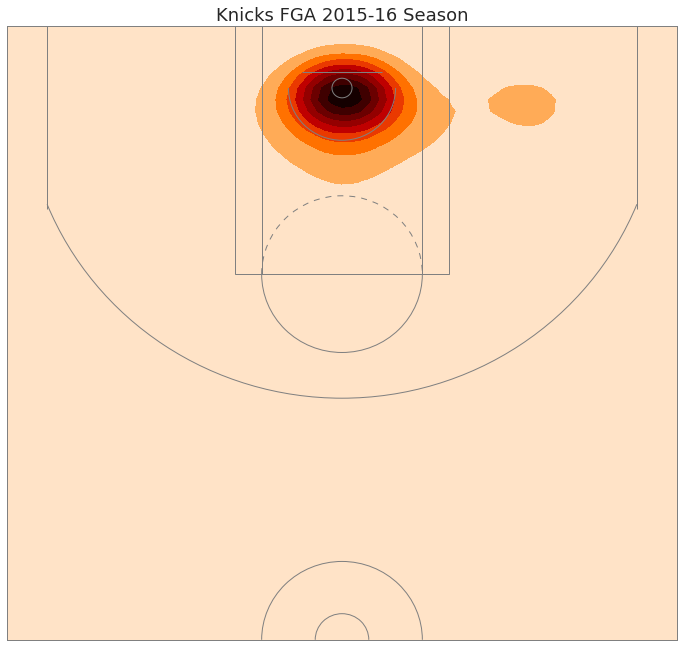

In [44]:
# get a colormap for the KDE shot chart
cmap=plt.cm.gist_heat_r

# Now plot the Knicks KDE shot chart
nba.shot_chart(knicks_shots_df.LOC_X, knicks_shots_df.LOC_Y,
               kind="kde", title="Knicks FGA 2015-16 Season",
               cmap=cmap)
plt.show()

We can adjust the number of contour levels for a KDE plot by passing in an integer to `n_levels`.

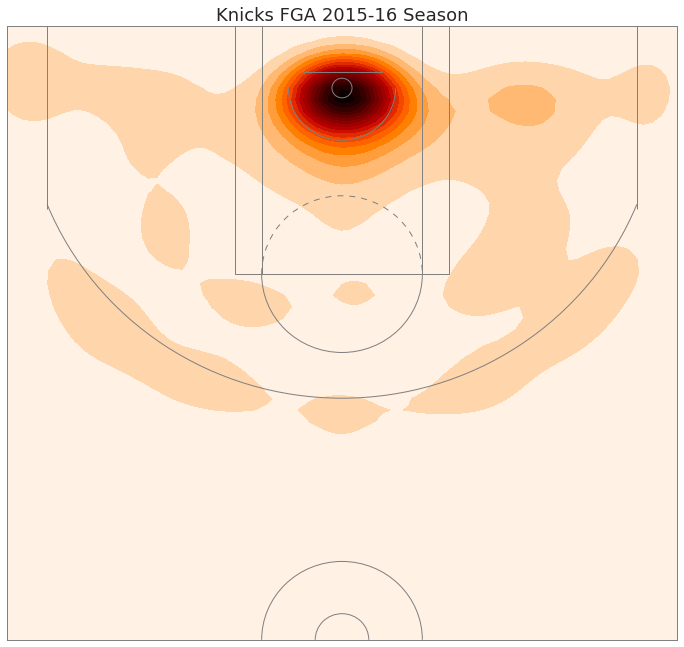

In [45]:
# Now plot the Knicks KDE shot chart with 20 contour levels
nba.shot_chart(knicks_shots_df.LOC_X, knicks_shots_df.LOC_Y,
               kind="kde", title="Knicks FGA 2015-16 Season",
               cmap=cmap, n_levels=20)
plt.show()

###Hexbin Shot Charts
Let's make some hexbin plots.

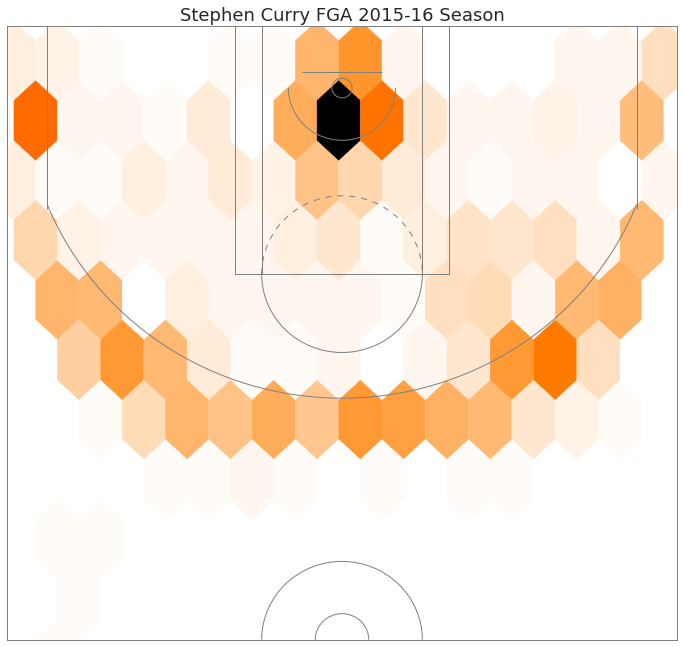

In [46]:
nba.shot_chart(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
               kind="hex", title="Stephen Curry FGA 2015-16 Season",
               cmap=cmap)

plt.show()

We can set the number hexbins in the x-axis direction via the `gridsize` parameter.

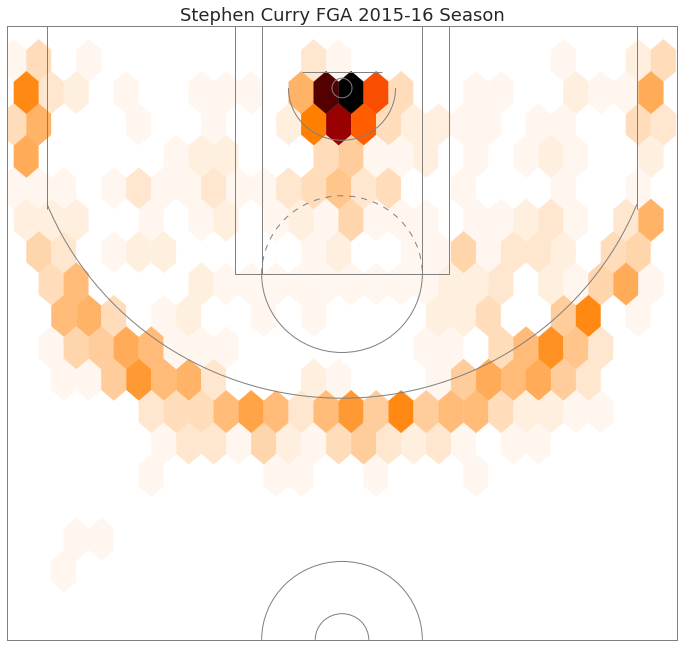

In [47]:
# Curry Hexbin plot with 26 hexbins across the x-axis
nba.shot_chart(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
               kind="hex", title="Stephen Curry FGA 2015-16 Season",
               cmap=cmap, gridsize=26)

plt.show()

##Using `shot_chart_jointplot()`

`shot_chart_jointplot()` is a light wrapper around `seaborn's` `jointplot()` function. Like `shot_chart()`, there are 3 kinds of plots you can create, scatter, kde, and hexbin plots.

###Scatter jointplot

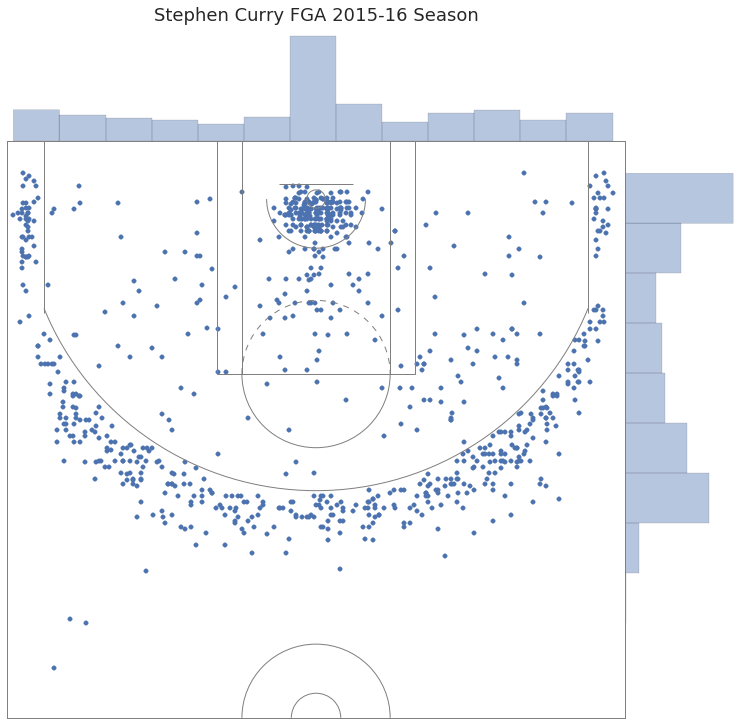

In [48]:
nba.shot_chart_jointplot(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
                        title="Stephen Curry FGA 2015-16 Season")
plt.show()

We can also pass in the `DataFrame` with our shots, and set x and y to the desired column names.

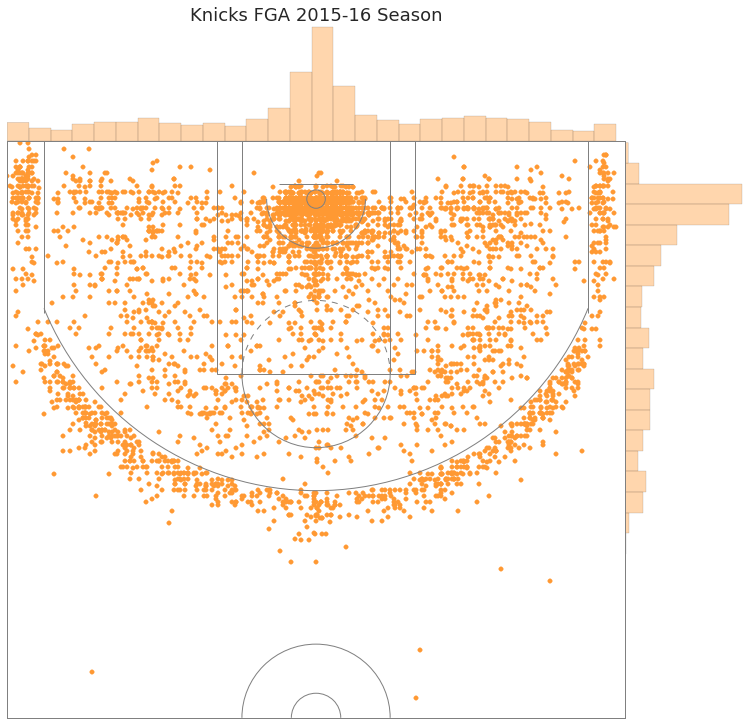

In [49]:
nba.shot_chart_jointplot(x="LOC_X", y="LOC_Y", data=knicks_shots_df,
                        color=cmap(.2), title="Knicks FGA 2015-16 Season")
plt.show()

###KDE jointplot
To create a KDE jointplot, all we need to do is just set `kind` to "kde".

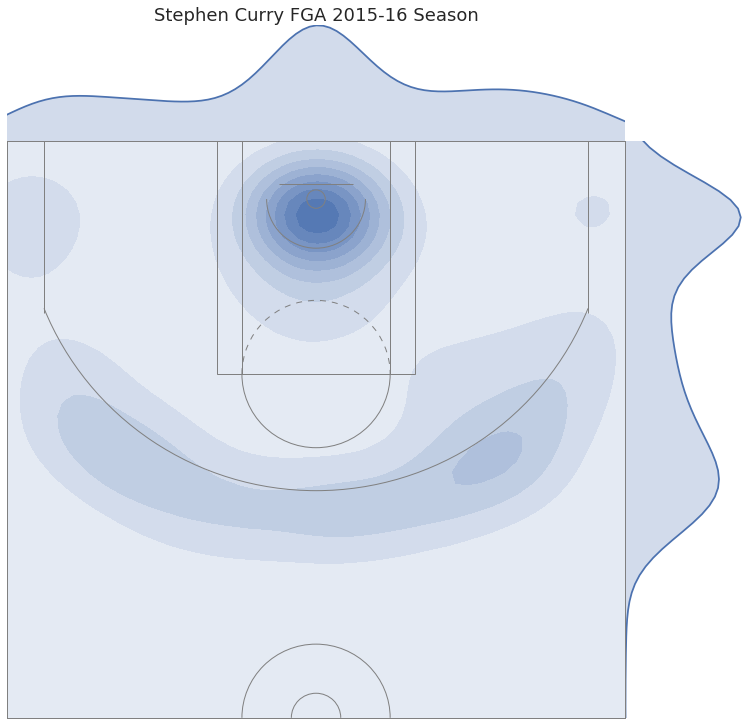

In [50]:
nba.shot_chart_jointplot(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
                         kind="kde", title="Stephen Curry FGA 2015-16 Season")
plt.show()

The colormap for the above plot is extracted from the value passed to `color`. When passing in a colormap for the jointplot make sure to set a proper `color` value as it controls the color of the marginal plot.

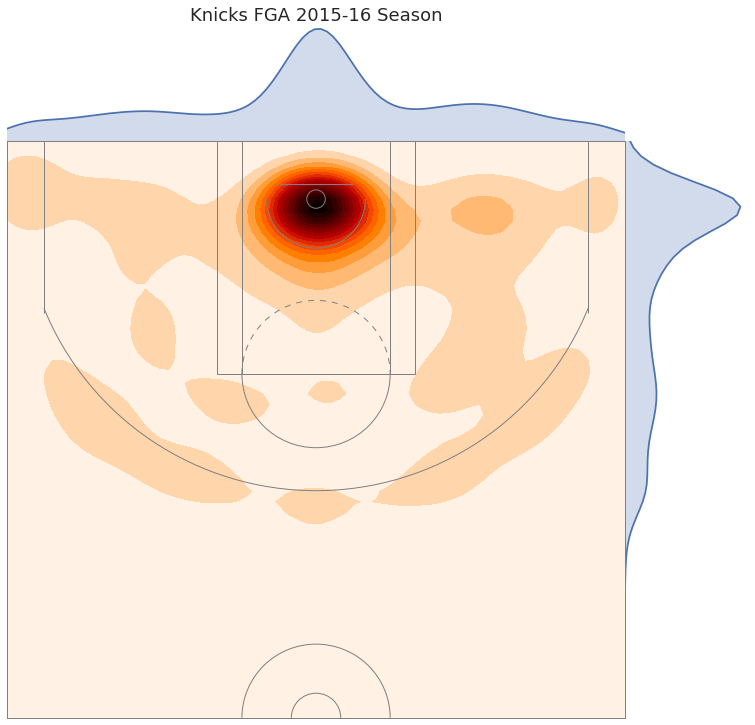

In [51]:
# Passing in a cmap value and not changing the default color value
nba.shot_chart_jointplot(knicks_shots_df.LOC_X, knicks_shots_df.LOC_Y,
                         kind="kde", title="Knicks FGA 2015-16 Season",
                         cmap=cmap, n_levels=20)
plt.show()

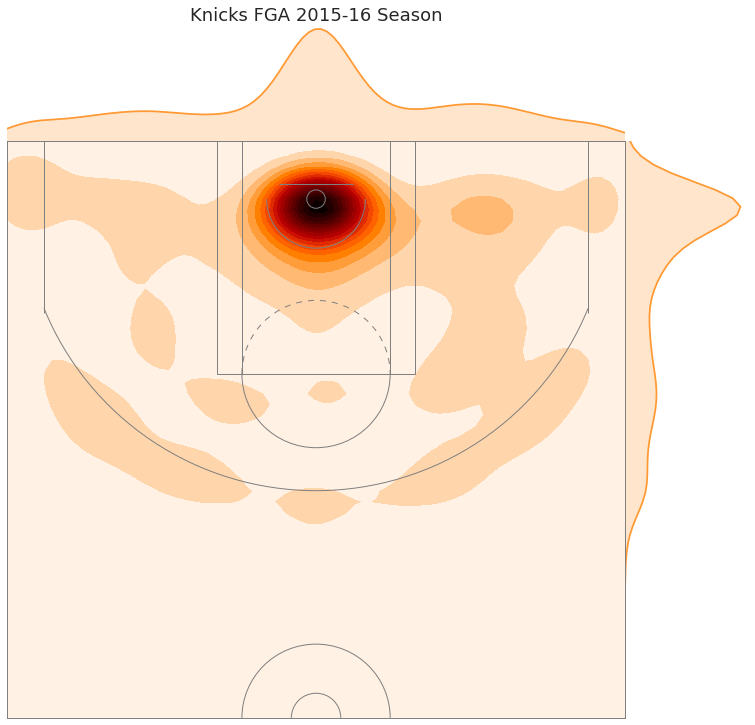

In [52]:
# Passing a cmap value and a color value
# The color is based on cmap
nba.shot_chart_jointplot(knicks_shots_df.LOC_X, knicks_shots_df.LOC_Y,
                         kind="kde", title="Knicks FGA 2015-16 Season",
                         color=cmap(.2), cmap=cmap, n_levels=20)
plt.show()

###Hexbin jointplot
To create a Hexbin jointplot, just set `kind` to "hex".

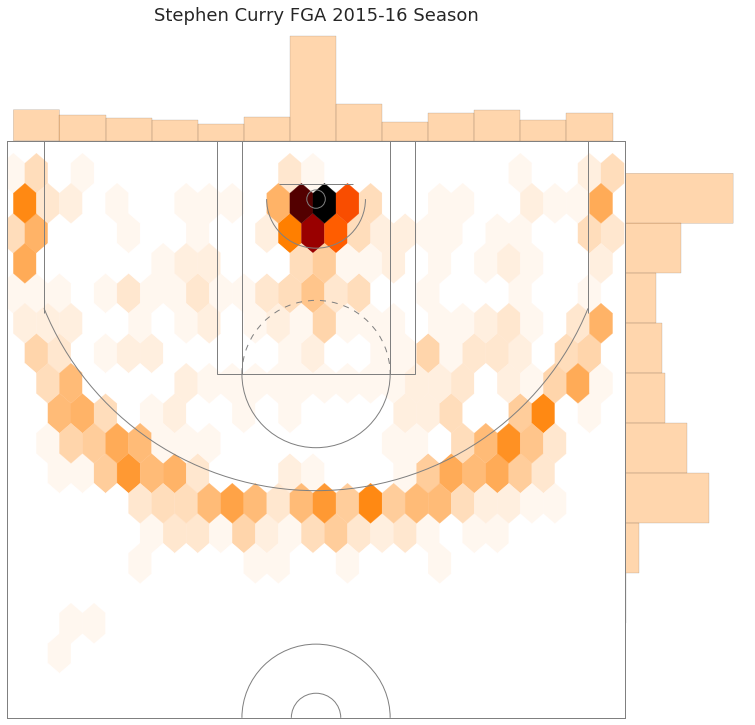

In [53]:
# marginal plot color value is based off cmap
nba.shot_chart_jointplot(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
                         kind="hex", title="Stephen Curry FGA 2015-16 Season",
                         color=cmap(.2), cmap=cmap, gridsize=26)
plt.show()

###Scatter plot and KDE contours on the same plot
We can plot the a KDE plot on the `JointGrid` that `shot_chart_jointplot()` retuns, by just calling on the `JointGrid`'s `plot_joint()` method and passing in `sns.kdeplot`.

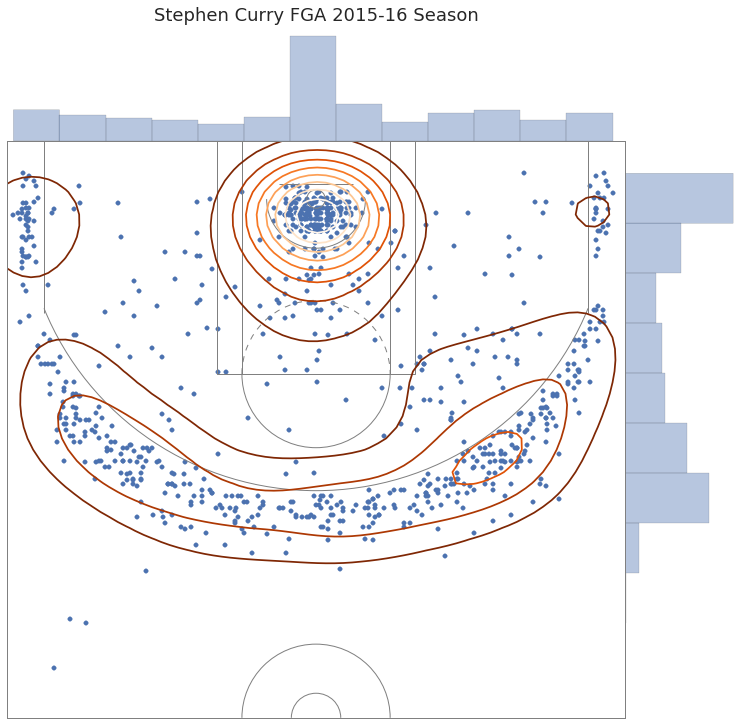

In [54]:
grid = nba.shot_chart_jointplot(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
                        title="Stephen Curry FGA 2015-16 Season")
grid.plot_joint(sns.kdeplot, cmap=plt.cm.Oranges_r)
plt.show()

##Using `shot_chart_jointgrid()`
`shot_chart_jointgrid()` is just a wrapper over `seaborn`'s `JointGrid`. It allows for a bit more flexibility than `sot_chart_jointplot()`.

By defualt, `shot_chart_jointgrid()` returns us a plot with a scatterplot on the joint plot and both KDE and histograms on the marginal plots.

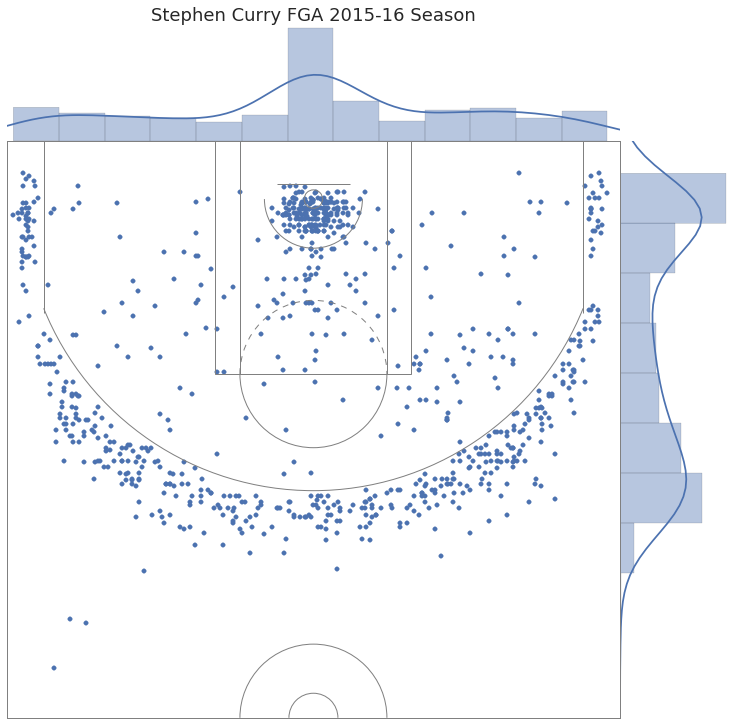

In [55]:
nba.shot_chart_jointgrid(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
                         title="Stephen Curry FGA 2015-16 Season")
plt.show()

###Adjusting the joint and marginal plots
To change the type of joint plot, we can pass in "scatter" (default), "kde", or "hex" to `joint_type`. To change the type of marginal plots, we can pass in "both" (default), "kde", or "hist" to `marginal_type`. We can adjust the color of the different plot components using the `joint_color` and `marginal_color` paramters. For the joint plot, if a colormap isn't passed to `cmap`, then the colormap for either the hexbin or kde plots will be based on `joint_color`. However, if we set a colormap then that will dictate the color for the kde or hexbin joint plot. Now lets run through a few examples.

####Adjusting the `joint_type`

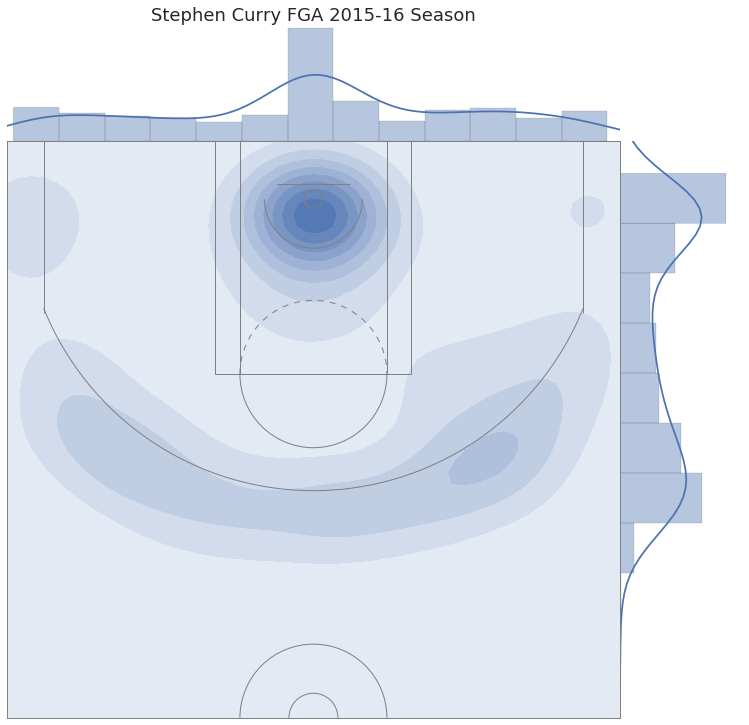

In [56]:
# set the joint_type to kde
nba.shot_chart_jointgrid(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
                         title="Stephen Curry FGA 2015-16 Season",
                         joint_type="kde")
plt.show()

####Adjusting the `joint_color`

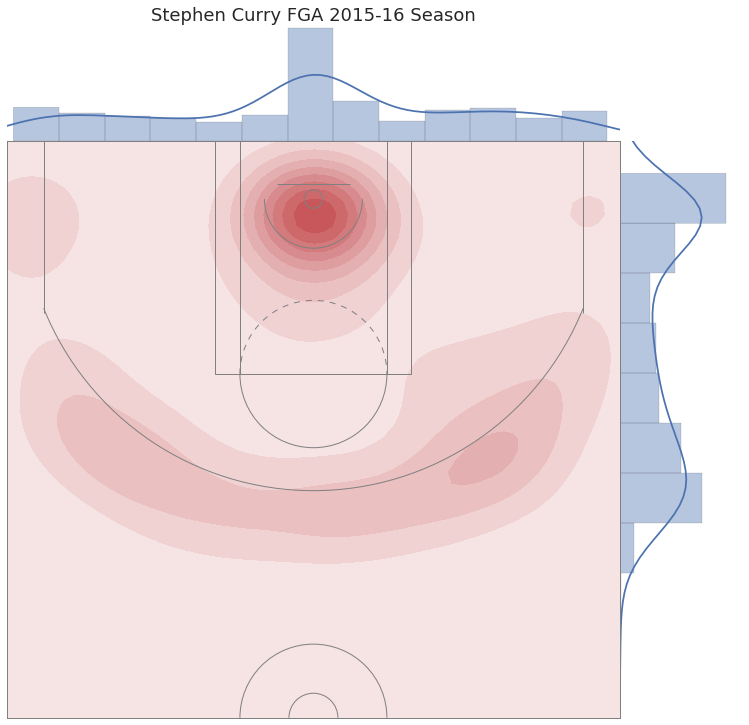

In [57]:
# adjust joint_color
nba.shot_chart_jointgrid(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
                         title="Stephen Curry FGA 2015-16 Season",
                         joint_type="kde", joint_color="r")
plt.show()

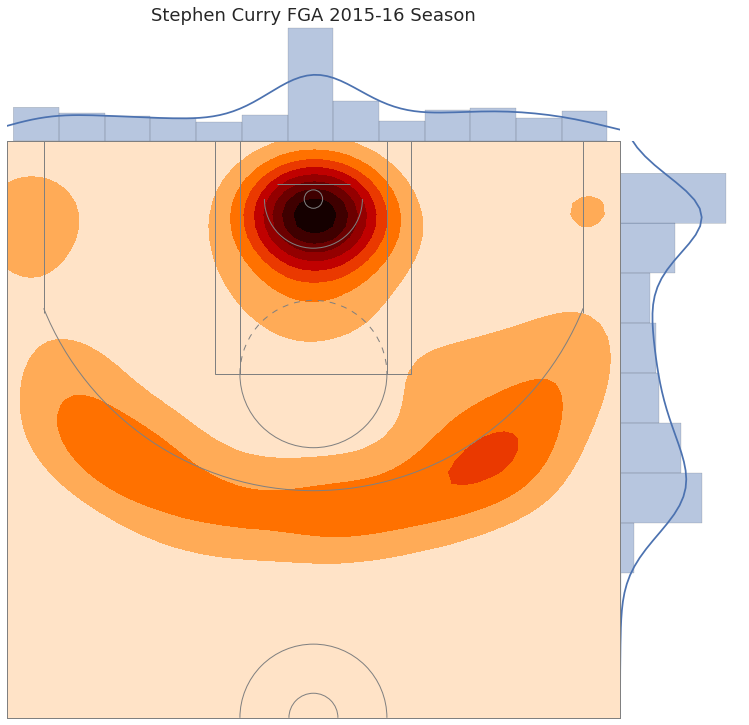

In [58]:
# Using cmap instead of joint_color for kde
nba.shot_chart_jointgrid(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
                         title="Stephen Curry FGA 2015-16 Season",
                         joint_type="kde", cmap=cmap)
plt.show()

####Adjusting `marginals_color`
Here we pass in a color to `marginals_color` to better match the joint plot's colormap.

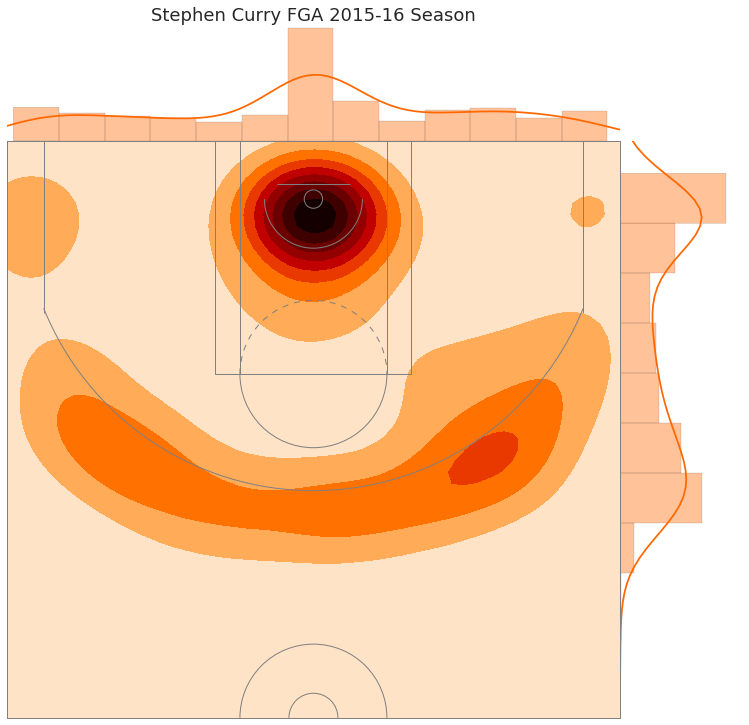

In [59]:
nba.shot_chart_jointgrid(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
                         title="Stephen Curry FGA 2015-16 Season",
                         joint_type="kde", cmap=cmap,
                         marginals_color=cmap(.3))
plt.show()

####Adjusting `marginal_type`
Plotting just histograms on the marginal plots.

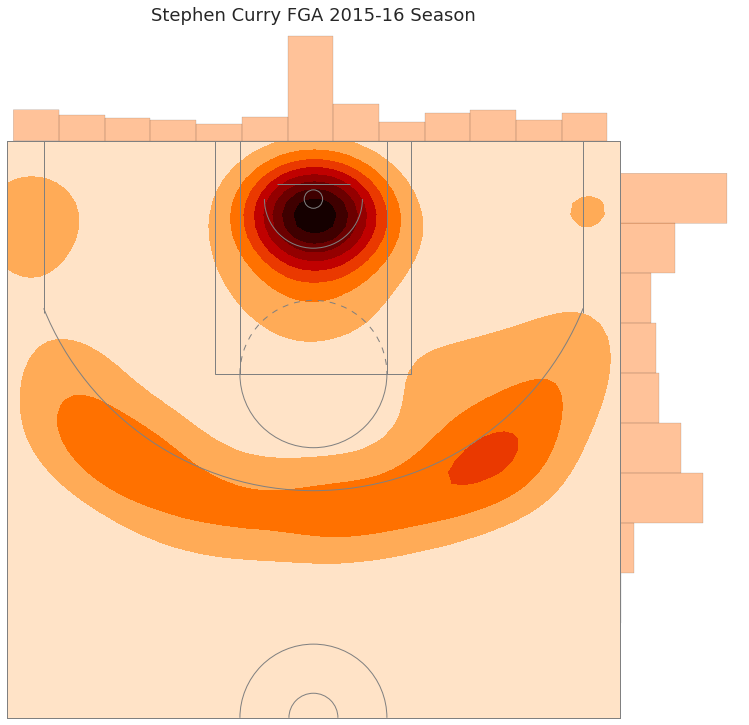

In [60]:
nba.shot_chart_jointgrid(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
                         title="Stephen Curry FGA 2015-16 Season",
                         joint_type="kde", cmap=cmap,
                         marginals_color=cmap(.3), marginals_type="hist")
plt.show()

Plotting KDE on marginal plots.

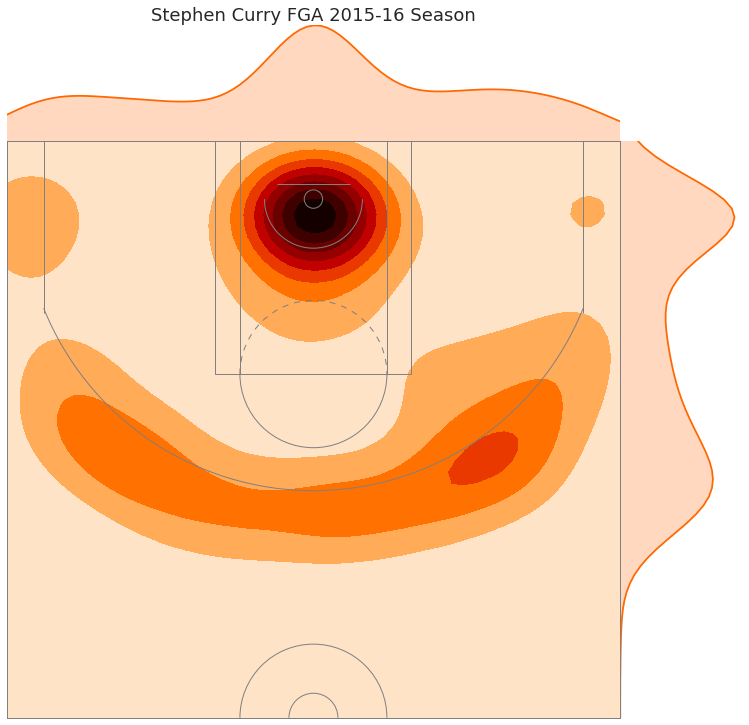

In [61]:
nba.shot_chart_jointgrid(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
                         title="Stephen Curry FGA 2015-16 Season",
                         joint_type="kde", cmap=cmap,
                         marginals_color=cmap(.3), marginals_type="kde")
plt.show()

####KDE Shading
We can get rid of the shading in the KDE marginal and joint plots by setting `joint_kde_shade` and `marginales_kde_shade` to `False`.

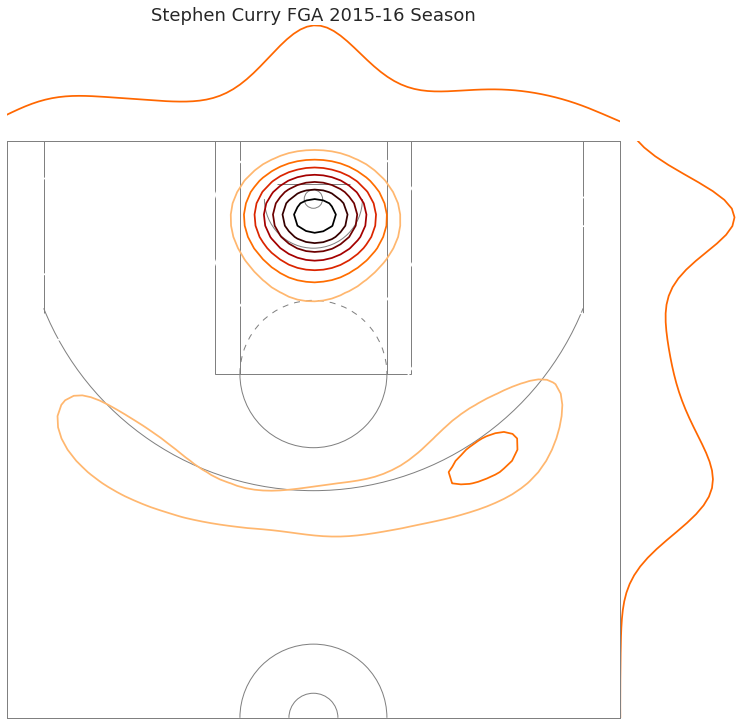

In [62]:
nba.shot_chart_jointgrid(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
                         title="Stephen Curry FGA 2015-16 Season",
                         joint_type="kde", cmap=cmap,
                         marginals_color=cmap(.3), marginals_type="kde",
                         joint_kde_shade=False, marginals_kde_shade=False)
plt.show()

####Scatter plot and KDE contours on the same plot

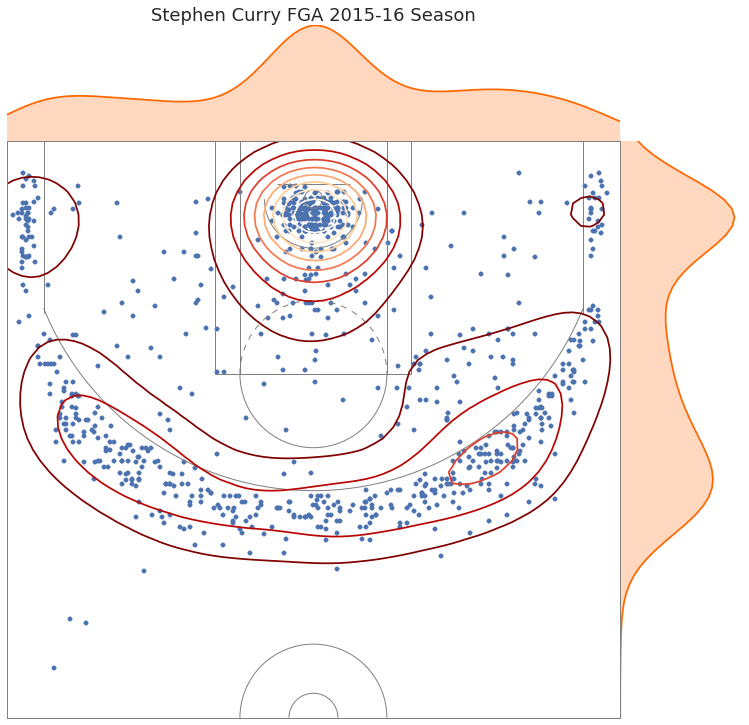

In [63]:
# Create the JointGrid object
grid = nba.shot_chart_jointgrid(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
                                title="Stephen Curry FGA 2015-16 Season",
                                joint_type="scatter", marginals_color=cmap(.3),
                                marginals_type="kde", joint_kde_shade=False)

grid.plot_joint(sns.kdeplot, cmap=plt.cm.OrRd_r)
plt.show()

##Creating a Heatmap for Field Goal Percentage
The `heatmap()` function allows us to plot a players FG%. All we need to do is pass in the x and y coordinates of the shot locations, and the an indicator that tells the function whether the FGA was made. The column that contains this information is called "SHOT_MADE_FLAG".

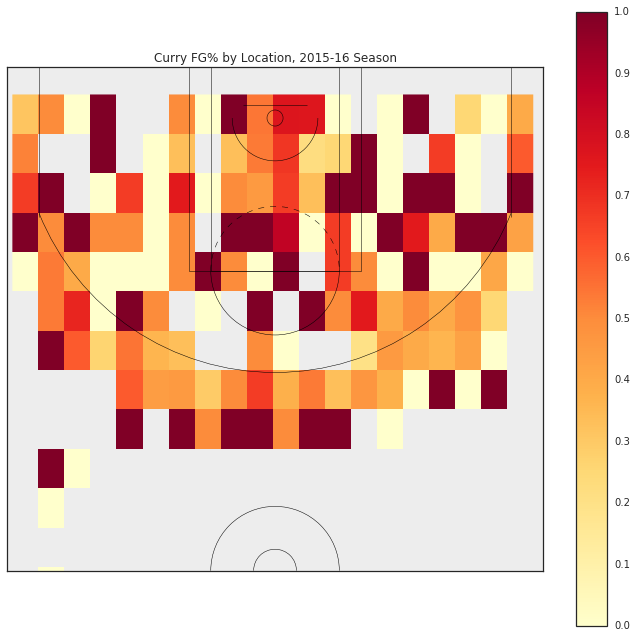

In [64]:
heatmap = nba.heatmap(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
                          curry_shots_df.SHOT_MADE_FLAG)

fig = plt.gcf()
fig.colorbar(heatmap)
plt.title("Curry FG% by Location, 2015-16 Season")
plt.show()

We can adjust the size of the boxes by adjusting the the number of bins along the x-axis via the `bins` paramter. To increase the size of the bins, decrease the number of bins. (The default values is 20).

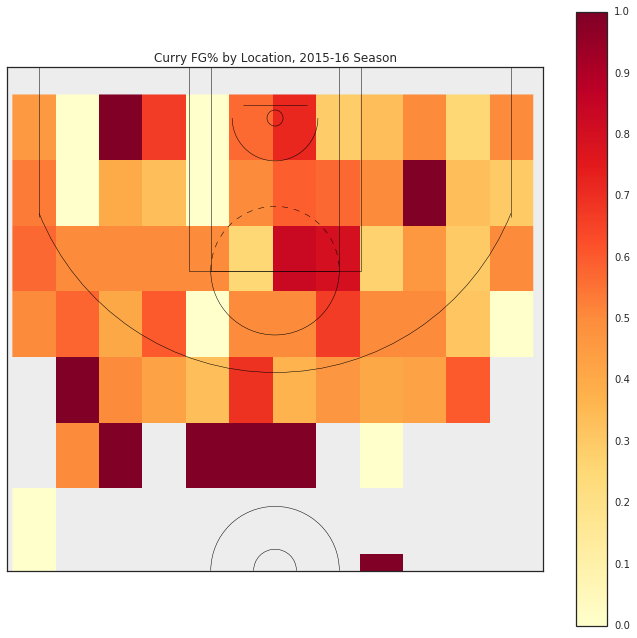

In [65]:
heatmap = nba.heatmap(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
                      curry_shots_df.SHOT_MADE_FLAG, bins=12)

fig = plt.gcf()
fig.colorbar(heatmap)
plt.title("Curry FG% by Location, 2015-16 Season")
plt.show()

##Adding a Player's Image to the Shot Chart
###Getting the Image using `get_player_img()`
All we need to do to get a player's image is to pass in his player id into the `get_player_img()` function.

In [66]:
img = nba.get_player_img(curry_id)

`get_player_img()` allows returns a `numpy array`, which allows us to plot the image using matplotlib.

In [67]:
type(img)

numpy.ndarray

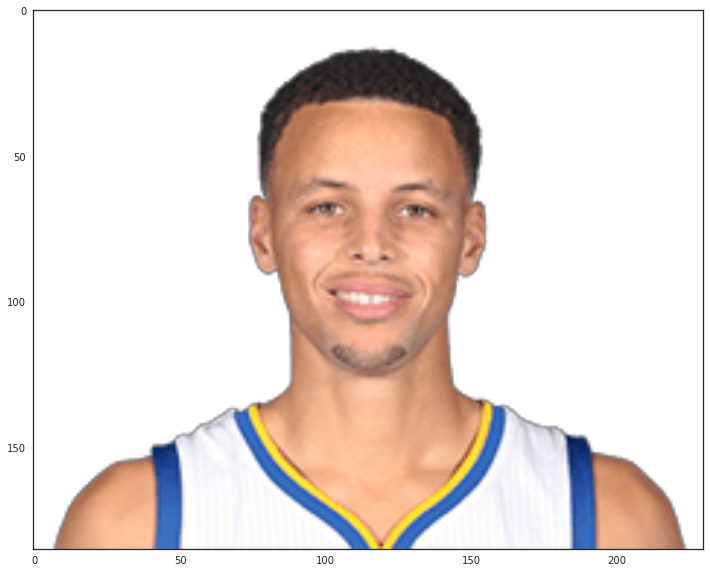

In [68]:
plt.imshow(img)

###Plotting the image using `OffsetImage`
To plot the player's image we need to import `OffsetImage`. It allows us to plot the image where ever we want on our shot chart.

In [69]:
from matplotlib.offsetbox import OffsetImage

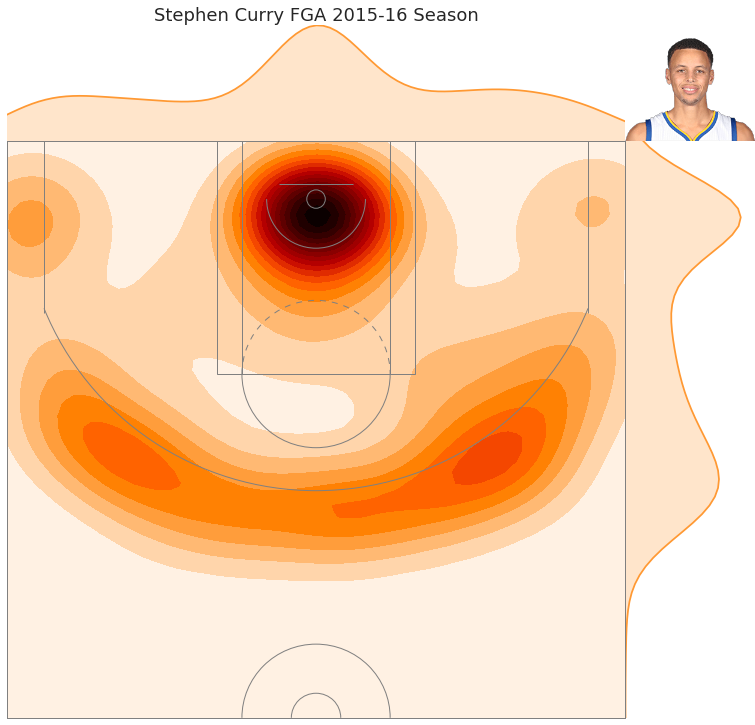

In [70]:
# Create our JointGrid - jointplot() returns a JointGrid object
grid = nba.shot_chart_jointplot(curry_shots_df.LOC_X, 
                                curry_shots_df.LOC_Y, kind="kde",
                                title="Stephen Curry FGA 2015-16 Season",
                                color=cmap(.2), cmap=cmap, n_levels=20)

# Create the OffsetImage object, also set the zoom
offset_img = OffsetImage(img, zoom=0.6)

# Pass in the x,y coordinates of where we want the 
# image to be plotted
offset_img.set_offset((621, 584))

# Pass in the OffsetImage object to the add_artist() method 
# from the joint plot Axes, in order to plot the image
grid.ax_joint.add_artist(offset_img)

plt.show()

##Creating Interactive Shot Charts using `bokeh_shot_chart()`
Lets import what we need to plot our shot charts in the notebook.


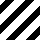
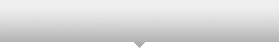
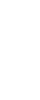
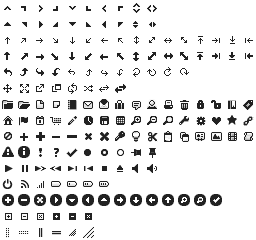
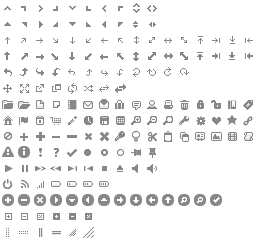
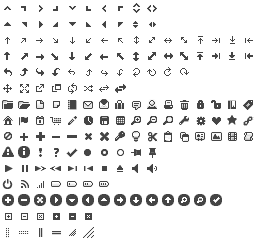
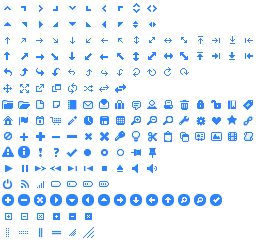
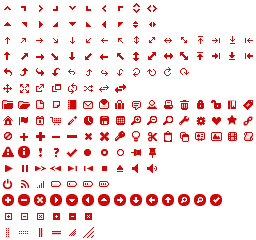
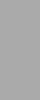
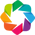
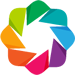
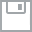
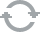
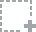
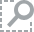
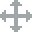
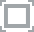
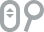

In [71]:
# output_notebook lets use render the Javascript in the IPython/Jupyter notebook
from bokeh.plotting import output_notebook, show

# Load BokehJS to render chart in the notebook
output_notebook()

To create our interactive shot chart we can use `bokeh_shot_chart()`. The function accepts the `DataFrame` with the shot chart data as the first argument. We can also pass in string values, that represent columns in the `DataFrame`, for the x and y parameters. The function, by default expects that the `DataFrame` we pass in contain columns called "LOC_X" and "LOC_Y".

In [72]:
fig = nba.bokeh_shot_chart(curry_shots_df)
show(fig)

If we pass in columns that aren't in the `DataFrame`, then nothing gets plotted except for the court.

In [73]:
fig = nba.bokeh_shot_chart(curry_shots_df, "z", "b")
show(fig)

ERROR:/home/savvas/miniconda/envs/py3/lib/python3.4/site-packages/bokeh/validation/check.py:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: b, z [renderer: GlyphRenderer, ViewModel:GlyphRenderer, ref _id: e6b7b19a-44ec-4dd6-9fab-e7b8b61c3951]


###Adding a Hover Tool
Before creating a tooltip for our shot chart, lets set things up so we can add some color to differentiate between missed and made FGAs.

First we create two dictionaries. One dictionary is our colormap to differentiate between missed and made shots.  The other dictionary contains the text indicating a missed or made shot.

In [74]:
# Create our dictionaries
# This dict provides the color indicating missed or made shots
colormap = {0: 'tomato', 1: '#1f77b4'}
# This dict provides the text
shot_outcome = {0: "MISSED", 1: "MADE"}

We then add two new columns to our DataFrame containing the values of our dictionaries. We do this by using the `map` method from the *SHOT_MADE_FLAG* column and use `lambda` to create an [anonymous function](http://www.python-course.eu/python3_lambda.php) that maps the values for each row (or shot) based on whether the *SHOT_MADE_FLAG* equals the keys in our dictionaries (0 for a missed shot and 1 for made shot).

In [75]:
# Add our new columns
# For each row (or shot) the new column value will be based
# on whether the SHOT_MADE_FLAG is 0 or 1
# If 0, then the color for that row will be tomato and its
# 'shot_outcome' will be 'Missed'
# If 1, then the color for that row will be #1f77b4 and its 
# shot_outcome will be 'Made'
curry_shots_df['color'] = curry_shots_df.SHOT_MADE_FLAG.map(lambda x: colormap[x])
curry_shots_df['shot_outcome'] = curry_shots_df.SHOT_MADE_FLAG.map(lambda x: shot_outcome[x])

To indicate the information we want in our hover tool, we create a list of (field name, value) tuples. The field name is just the text label that will show up on the tooltip. The value is just the column name, prefixed with an '@', that contains the data that will show up on the tooltip. Read more on the hover tool [here](http://bokeh.pydata.org/en/0.10.0/docs/user_guide/tools.html#hover-tool).

In [76]:
# The values prefixed by '@' are just column names from our DataFrame
# $index is just the index (row) value for each shot attempt,
# starting from 0
tooltips=[("Shot Index", "$index"), ("Shot Type", "@SHOT_TYPE"),
          ("Shot Outcome", "@shot_outcome"), ("Action Type", "@ACTION_TYPE"),
          ("Shot Distance", "@SHOT_DISTANCE ft")]

We can now add our hover tool by setting `hover_tool` to `True` and passing in the above list to `tooltips`. To differentiate between missed and made FGAs we set `fill_color` to the column name ("color") that contains the color values we mapped into our `DataFrame`.

In [77]:
fig = nba.bokeh_shot_chart(curry_shots_df, fill_color="color",
                           hover_tool=True, tooltips=tooltips)
show(fig)

##Similar Libraries
Here are some NBA stats oriented libraries for Python and R:

Python:
- [py-Goldsberry](https://github.com/bradleyfay/py-Goldsberry)
- [nba_py](https://github.com/seemethere/nba_py)

R:
- [nbastatR](https://github.com/abresler/nbastatR)

##Useful Resources and Blog Posts
Here are a few resources and blog posts (including a couple of my own) that make use of the NBA stats API:

- [Nylon Calculus](http://nyloncalculus.com/) - The best NBA analytics website. 
    - Check out their [Nylon Calculus 101 page](http://nyloncalculus.com/glossary/). It contains a lot of useful information and a few Python tutorials.
- [Web Scraping 201: Finding the API](http://www.gregreda.com/2015/02/15/web-scraping-finding-the-api/) - A tutorial on scraping the NBA stats API using Python.
- [My own blog](savvastjortjoglou.com) and my [post](http://savvastjortjoglou.com/nba-shot-sharts.html) that goes over creating shot charts.
- [Exploring NBA Data with Python](http://www.danielforsyth.me/exploring_nba_data_in_python/) - Another NBA stats API Python tutorial.
- [Creating NBA Shot Charts](http://www.danvatterott.com/blog/2015/12/22/creating-nba-shot-charts/) - Goes over how to plot FG percentage and FGA using Python.
- [How to Create NBA Shot Charts in R](http://thedatagame.com.au/2015/09/27/how-to-create-nba-shot-charts-in-r/) - An R tutorial that goes over how to create shot charts using ggplot2.